<a href="https://www.kaggle.com/code/nishantjswl/cat-dog-identifier?scriptVersionId=162770822" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# Creating a is it a dog or a cat model using the fastai library


Installing all the required modules needed for this project

In [103]:
iskaggle = os.environ.get('KAGGLE_KERNAL_RUN_TYPE','')
if iskaggle:
    !pip install -q fastai
    !pip install -q duckduckgo_search
   

In [ ]:
 !pip install -q fastbook

In [ ]:
from fastbook import *
from fastdownload import download_url
from fastai.vision.all import * 

In [ ]:
def search_images(search_term , max_num = 30):
    print(f"Searching for {search_term} ")
    return L(search_images_ddg(search_term , max_images = max_num))  

In [ ]:
dest = 'smile.jpg'
url = search_images('smiling dogs')
download_url(url[0],dest,show_progress = True)
im = Image.open(dest)
im.to_thumb(196,196)


# Downloading cats and dogs images and saving them in dogs / cats directory

In [ ]:
searches = 'dogs', 'cats'
path = Path('dogs_or_cat')

from time import sleep

for i in searches:
    dest = (path/i)
    dest.mkdir(exist_ok =True , parents= True)
    download_images(dest,urls= search_images(f'{i} photo'))
    sleep(10)
    download_images(dest,urls= search_images(f'{i} smiling photo'))
    sleep(10)
    download_images(dest,urls= search_images(f'{i} staring photo'))
    sleep(10)
    resize_images(path/i,max_size = 256 , dest = path/i)

# Now deleting the images which failed to download properly 


In [ ]:
import os
from pathlib import Path

def delete_failed_images(path):
    """
    Verifies images in a directory, deletes failed images, and reports the count.

    Args:
        path (str or Path): Path to the directory containing images.

    Returns:
        int: Number of failed images deleted.
    """

    path = Path(path)  
    failed_images = verify_images(get_image_files(path))

    deleted_count = 0
    for image_path in failed_images:
        if image_path.is_file(): 
            try:
                image_path.unlink()  
                deleted_count += 1
                print(f"Deleted failed image: {image_path}")
            except OSError as e:
                print(f"Error deleting {image_path}: {e}")
        else:
            print(f"Skipping non-file: {image_path}")

    return deleted_count

failed_count = delete_failed_images("dogs_or_cat")  
print(f"Total failed images deleted: {failed_count}")

# Now creating a datablock 

In [ ]:
db = DataBlock(
blocks =(ImageBlock, CategoryBlock),
    get_items = get_image_files,
    splitter = RandomSplitter(valid_pct = 0.2 , seed =42),
    get_y = parent_label,
    item_tfms =[Resize(196 , method = 'squish')]).dataloaders(path,bs=32)
db.show_batch(max_n=6)
    

# Now training the the model(Using the populer computer vision model i.e. resnet18)

In [ ]:
learn = vision_learner(db,resnet18,metrics = error_rate)
learn.fine_tune(3)

# Using the model to check if the image is of dog or cat 

Image you provided :-


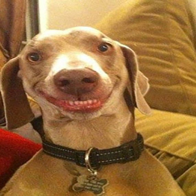

The image you provided is of a dog | probability - 0.9510


In [101]:
dest = 'smile.jpg'
img = PILImage.create(dest)
what_is_it, _, probs = learn.predict(img)
print("Image you provided :-")

# Resize the image to 196x196 pixels and then display
resized_img = img.resize((196, 196))
display(resized_img)

if what_is_it == 'cats':
    print(f"The image you provided is of a cat | probability - {probs[0]:.4f}")
else:
    print(f"The image you provided is of a dog | probability - {prob:.4f}")
